In [1]:
import numpy as np # linear algebra
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
fb_data_df = pd.read_csv('pseudo_facebook.csv')
fb_data_df.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0


In [4]:
# check for missing values
print(len(fb_data_df),'Total data available ')
fb_data_df.isnull().sum()

99003 Total data available 


userid                     0
age                        0
dob_day                    0
dob_year                   0
dob_month                  0
gender                   175
tenure                     2
friend_count               0
friendships_initiated      0
likes                      0
likes_received             0
mobile_likes               0
mobile_likes_received      0
www_likes                  0
www_likes_received         0
dtype: int64

In [5]:
fb_data_df.dropna(how = 'any', inplace = True)

In [6]:
fb_data_df.dtypes

userid                     int64
age                        int64
dob_day                    int64
dob_year                   int64
dob_month                  int64
gender                    object
tenure                   float64
friend_count               int64
friendships_initiated      int64
likes                      int64
likes_received             int64
mobile_likes               int64
mobile_likes_received      int64
www_likes                  int64
www_likes_received         int64
dtype: object

In [7]:
# only change needed is to take tenure as int
fb_data_df ['tenure'] = fb_data_df['tenure'].astype('int')

In [8]:
min(fb_data_df['age']), max(fb_data_df['age'])

(13, 113)

In [9]:
# min age is 13 and max is 113 so we will take 10 as lowerbound and 120 as upperbound for creating age groups
lables = ['10-20','21-30','31-40','41-50','51-60','61-70','71-80','81-90','91-100','101-110','111-120']
fb_data_df['age_group'] = pd.cut(fb_data_df['age'], bins = np.arange(10, 121, 10), labels = lables, right=True)
fb_data_df.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,age_group
0,2094382,14,19,1999,11,male,266,0,0,0,0,0,0,0,0,10-20
1,1192601,14,2,1999,11,female,6,0,0,0,0,0,0,0,0,10-20
2,2083884,14,16,1999,11,male,13,0,0,0,0,0,0,0,0,10-20
3,1203168,14,25,1999,12,female,93,0,0,0,0,0,0,0,0,10-20
4,1733186,14,4,1999,12,male,82,0,0,0,0,0,0,0,0,10-20


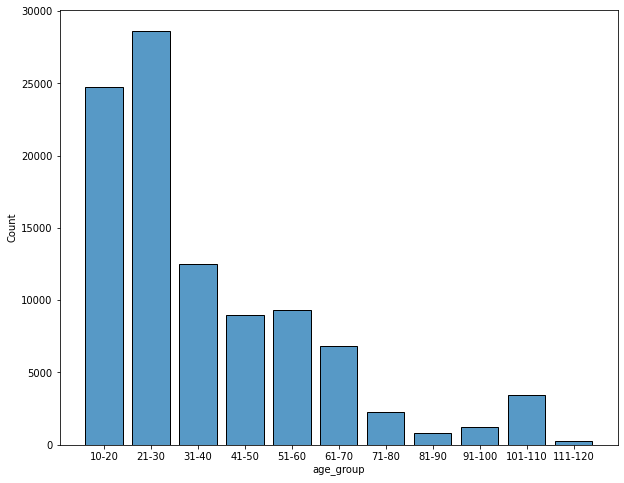

In [10]:
# age group vs count histogram
import seaborn as sns
plt.subplots(figsize = (10,8))
sns.histplot(fb_data_df, x = 'age_group', multiple="dodge", shrink = 0.8)
plt.show()

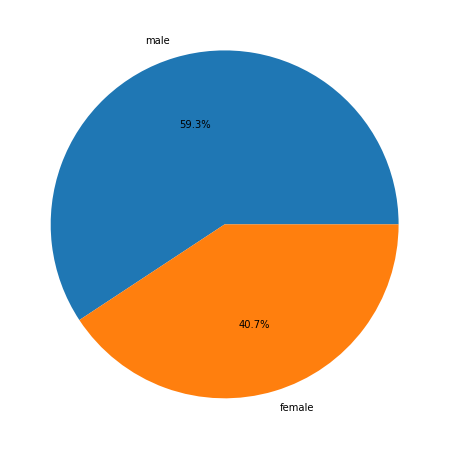

In [11]:
# male female count
gender_counts = fb_data_df['gender'].value_counts()
plt.subplots(figsize=(10,8))
plt.pie(gender_counts, labels = ['male','female'], autopct='%1.1f%%')
plt.show()

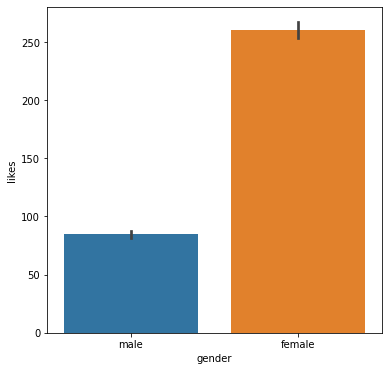

In [12]:
# likes  count vs age group and gender
plt.subplots(figsize = (6,6))
sns.barplot(data = fb_data_df,x = 'gender',y = 'likes')
plt.show()

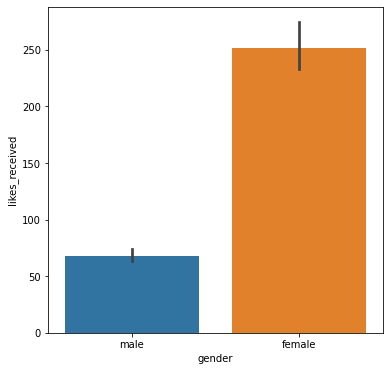

In [13]:
# likes_recieved vs gender  
plt.subplots(figsize = (6,6))
sns.barplot(data = fb_data_df,x = 'gender',y = 'likes_received')
plt.show()

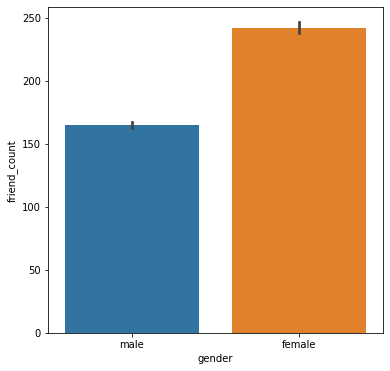

In [14]:
# friend  count vs age groupu and gender
plt.subplots(figsize = (6,6))
sns.barplot(data = fb_data_df,x = 'gender',y = 'friend_count')
plt.show()

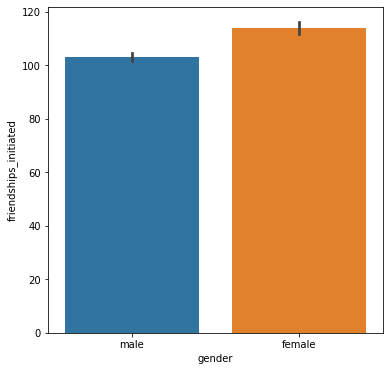

In [15]:
# friendships_initiated vs age group and gender
plt.subplots(figsize = (6,6))
sns.barplot(data = fb_data_df,x = 'gender',y = 'friendships_initiated')
plt.show()

In [16]:
lables = ['0-1 year','1-2 years','2-3 years','3-4 years','4-5 years','5-6 years','6-7 years','7-8 years','8-9 years']
fb_data_df['year_group'] = pd.cut(fb_data_df['tenure'], bins = np.arange(-1, 3285 + 1, 365), labels =lables)
fb_data_df.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,age_group,year_group
0,2094382,14,19,1999,11,male,266,0,0,0,0,0,0,0,0,10-20,0-1 year
1,1192601,14,2,1999,11,female,6,0,0,0,0,0,0,0,0,10-20,0-1 year
2,2083884,14,16,1999,11,male,13,0,0,0,0,0,0,0,0,10-20,0-1 year
3,1203168,14,25,1999,12,female,93,0,0,0,0,0,0,0,0,10-20,0-1 year
4,1733186,14,4,1999,12,male,82,0,0,0,0,0,0,0,0,10-20,0-1 year


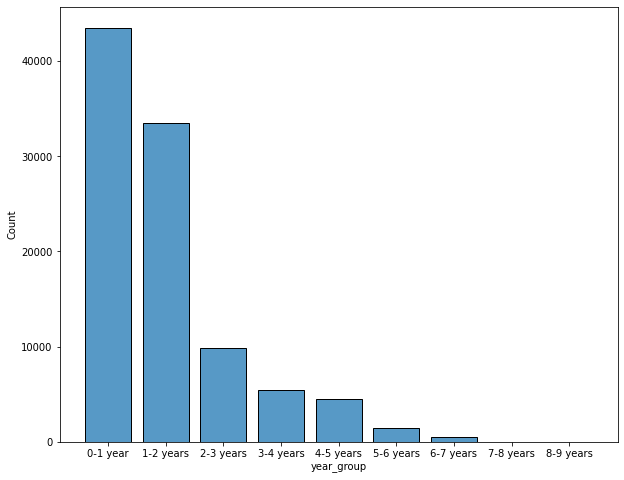

In [17]:
# year group histogram
plt.subplots(figsize = (10,8))
sns.histplot(data = fb_data_df,x = 'year_group', multiple = 'dodge', shrink = 0.8)
plt.show()

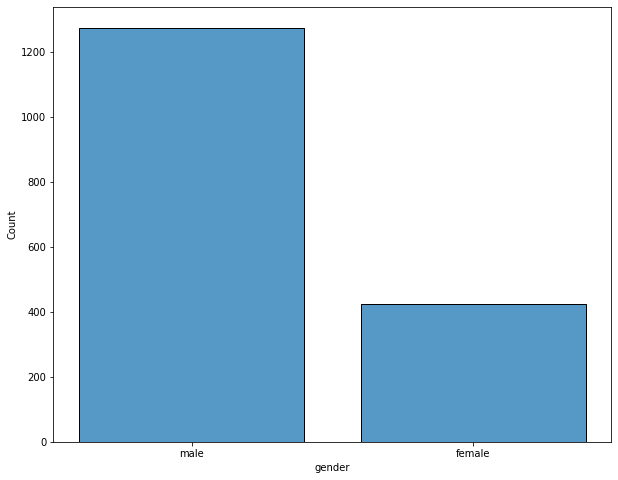

In [18]:
inactive_users = fb_data_df.query('friend_count == 0 and friendships_initiated == 0 and likes == 0')
plt.subplots(figsize = (10,8))
sns.histplot(data = inactive_users, x = 'gender', shrink = 0.8)
plt.show()

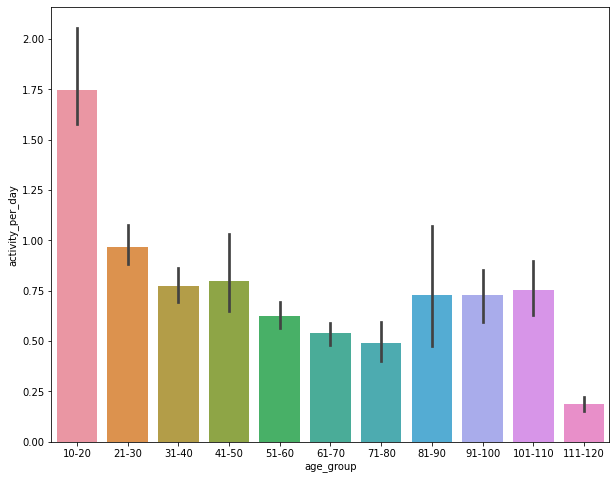

In [19]:
#  age group vs activity per day
fb_data_df['activity_per_day'] = (fb_data_df['friendships_initiated']/fb_data_df['tenure'] + fb_data_df['likes']/fb_data_df['tenure']).replace([np.nan, np.inf, -np.inf], 0)
plt.subplots(figsize = (10,8))
sns.barplot(data = fb_data_df,x = 'age_group',y = 'activity_per_day')
plt.show()

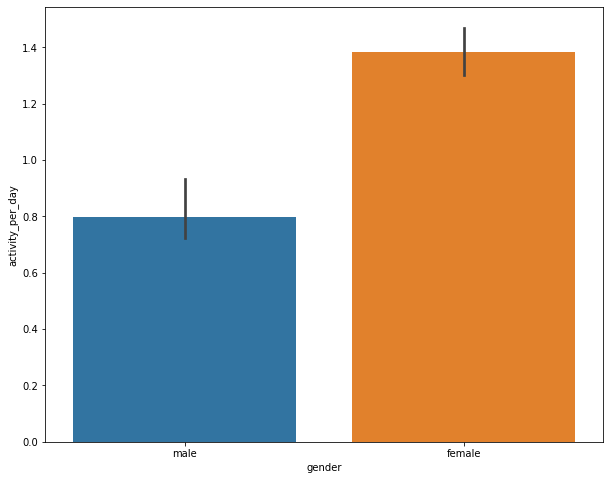

In [20]:
# gender vs activity per day barplot
plt.subplots(figsize = (10,8))
sns.barplot(data = fb_data_df,x = 'gender',y = 'activity_per_day')
plt.show()

In [21]:
fb_data_df.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,age_group,year_group,activity_per_day
0,2094382,14,19,1999,11,male,266,0,0,0,0,0,0,0,0,10-20,0-1 year,0.0
1,1192601,14,2,1999,11,female,6,0,0,0,0,0,0,0,0,10-20,0-1 year,0.0
2,2083884,14,16,1999,11,male,13,0,0,0,0,0,0,0,0,10-20,0-1 year,0.0
3,1203168,14,25,1999,12,female,93,0,0,0,0,0,0,0,0,10-20,0-1 year,0.0
4,1733186,14,4,1999,12,male,82,0,0,0,0,0,0,0,0,10-20,0-1 year,0.0


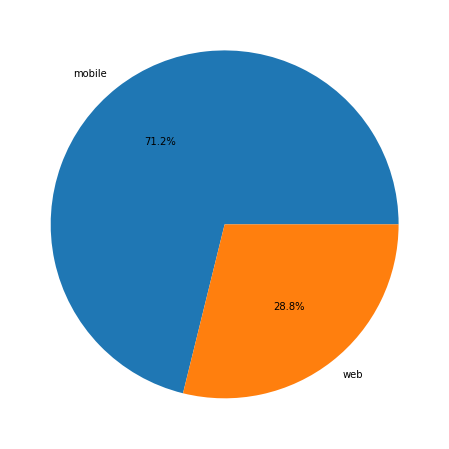

In [22]:
# first get all the active users
active_users = fb_data_df.query("friendships_initiated !=0 and likes != 0").reset_index(drop=True)
# get wich platform they are using
active_users['use_method'] = (active_users['mobile_likes'] >= active_users['www_likes']).replace({True : 'mobile', False : 'web'})

# plot it
plt.subplots(figsize = (10,8))
plt.pie(active_users['use_method'].value_counts(), labels = ['mobile','web'], autopct='%1.1f%%')
plt.show()

In [23]:
fb_data_df

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,age_group,year_group,activity_per_day
0,2094382,14,19,1999,11,male,266,0,0,0,0,0,0,0,0,10-20,0-1 year,0.000000
1,1192601,14,2,1999,11,female,6,0,0,0,0,0,0,0,0,10-20,0-1 year,0.000000
2,2083884,14,16,1999,11,male,13,0,0,0,0,0,0,0,0,10-20,0-1 year,0.000000
3,1203168,14,25,1999,12,female,93,0,0,0,0,0,0,0,0,10-20,0-1 year,0.000000
4,1733186,14,4,1999,12,male,82,0,0,0,0,0,0,0,0,10-20,0-1 year,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98998,1268299,68,4,1945,4,female,541,2118,341,3996,18089,3505,11887,491,6202,61-70,1-2 years,8.016636
98999,1256153,18,12,1995,3,female,21,1968,1720,4401,13412,4399,10592,2,2820,10-20,0-1 year,291.476190
99000,1195943,15,10,1998,5,female,111,2002,1524,11959,12554,11959,11462,0,1092,10-20,0-1 year,121.468468
99001,1468023,23,11,1990,4,female,416,2560,185,4506,6516,4506,5760,0,756,21-30,1-2 years,11.276442


In [24]:
fb_data_df.shape

(98826, 18)

In [25]:
98826*18

1778868

In [26]:
sub1=fb_data_df[:100]

In [27]:
sub1

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,age_group,year_group,activity_per_day
0,2094382,14,19,1999,11,male,266,0,0,0,0,0,0,0,0,10-20,0-1 year,0.0
1,1192601,14,2,1999,11,female,6,0,0,0,0,0,0,0,0,10-20,0-1 year,0.0
2,2083884,14,16,1999,11,male,13,0,0,0,0,0,0,0,0,10-20,0-1 year,0.0
3,1203168,14,25,1999,12,female,93,0,0,0,0,0,0,0,0,10-20,0-1 year,0.0
4,1733186,14,4,1999,12,male,82,0,0,0,0,0,0,0,0,10-20,0-1 year,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1126847,15,5,1998,5,male,89,0,0,0,0,0,0,0,0,10-20,0-1 year,0.0
96,1056469,15,19,1998,5,female,56,0,0,0,0,0,0,0,0,10-20,0-1 year,0.0
97,2190921,15,17,1998,5,male,21,0,0,0,0,0,0,0,0,10-20,0-1 year,0.0
98,1496299,15,30,1998,6,male,63,0,0,0,0,0,0,0,0,10-20,0-1 year,0.0


In [28]:
sub1.shape

(100, 18)

In [33]:
sub2=fb_data_df[100:200]

In [34]:
sub2.shape

(100, 18)

In [45]:
sub1_sub2=sub1.merge(sub2,how='left')

In [46]:
sub1_sub2.shape

(100, 18)

In [47]:
sub1_sub2

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,age_group,year_group,activity_per_day
0,2094382,14,19,1999,11,male,266,0,0,0,0,0,0,0,0,10-20,0-1 year,0.0
1,1192601,14,2,1999,11,female,6,0,0,0,0,0,0,0,0,10-20,0-1 year,0.0
2,2083884,14,16,1999,11,male,13,0,0,0,0,0,0,0,0,10-20,0-1 year,0.0
3,1203168,14,25,1999,12,female,93,0,0,0,0,0,0,0,0,10-20,0-1 year,0.0
4,1733186,14,4,1999,12,male,82,0,0,0,0,0,0,0,0,10-20,0-1 year,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1126847,15,5,1998,5,male,89,0,0,0,0,0,0,0,0,10-20,0-1 year,0.0
96,1056469,15,19,1998,5,female,56,0,0,0,0,0,0,0,0,10-20,0-1 year,0.0
97,2190921,15,17,1998,5,male,21,0,0,0,0,0,0,0,0,10-20,0-1 year,0.0
98,1496299,15,30,1998,6,male,63,0,0,0,0,0,0,0,0,10-20,0-1 year,0.0


In [49]:
fb_data_df.sort_values(by='age',ascending=False)

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,age_group,year_group,activity_per_day
61534,2142052,113,1,1900,1,female,1356,125,68,7,1,0,0,7,1,111-120,3-4 years,0.055310
81991,1495236,113,27,1900,7,female,1755,281,181,536,186,0,12,536,174,111-120,4-5 years,0.408547
55202,2035075,113,23,1900,12,female,1656,100,24,477,117,477,75,0,42,111-120,4-5 years,0.302536
41460,1644095,113,1,1900,4,female,1816,64,12,2,7,0,5,2,2,111-120,4-5 years,0.007709
12669,1514877,113,1,1900,1,male,1177,13,3,0,0,0,0,0,0,111-120,3-4 years,0.002549
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20822,1527546,13,1,2000,1,male,52,25,16,3,0,3,0,0,0,10-20,0-1 year,0.365385
41771,1569606,13,23,2000,6,male,77,62,23,11,14,0,0,11,14,10-20,0-1 year,0.441558
96943,1240248,13,14,2000,7,female,970,1183,491,3414,3428,109,1360,3305,2068,10-20,2-3 years,4.025773
41757,1352021,13,24,2000,1,female,261,63,56,10,1,10,1,0,0,10-20,0-1 year,0.252874


In [52]:
fb_data_df.transpose()

,0,1,2,3,4,5,6,7,8,9,...,98993,98994,98995,98996,98997,98998,98999,99000,99001,99002
userid,2094382,1192601,2083884,1203168,1733186,1524765,1136133,1680361,1365174,1712567,...,1654565,2063006,1132164,1668695,1458985,1268299,1256153,1195943,1468023,1397896
age,14,14,14,14,14,14,13,13,13,13,...,19,20,20,24,28,68,18,15,23,39
dob_day,19,2,16,25,4,1,14,4,1,2,...,15,4,9,25,14,4,12,10,11,15
dob_year,1999,1999,1999,1999,1999,1999,2000,2000,2000,2000,...,1994,1993,1993,1989,1985,1945,1995,1998,1990,1974
dob_month,11,11,11,12,12,12,1,1,1,2,...,8,1,10,4,12,4,3,5,4,5
gender,male,female,male,female,male,male,male,female,male,male,...,male,female,female,female,female,female,female,female,female,female
tenure,266,6,13,93,82,15,12,0,81,171,...,394,402,699,182,290,541,21,111,416,397
friend_count,0,0,0,0,0,0,0,0,0,0,...,4538,1988,3611,2938,2218,2118,1968,2002,2560,2049
friendships_initiated,0,0,0,0,0,0,0,0,0,0,...,4144,332,973,1272,1618,341,1720,1524,185,768
likes,0,0,0,0,0,0,0,0,0,0,...,4501,7351,4507,6018,4626,3996,4401,11959,4506,9410
